# Storytelling With Data Visualizations


First, establish the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Produce charts from the mpg dataset
load the [mpg dataset](https://ggplot2.tidyverse.org/reference/mpg.html) Source: https://github.com/tidyverse/ggplot2/blob/master/data-raw/mpg.csv

In [2]:
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/Python/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""


mpg = pd.read_csv(data_file_prefix + "mpg.csv")

## Quick Exploratory Data Analysis

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


## Visualizing Amounts

### Bar Plots
Bar charts are useful to display counts and other values associated with categorical data.

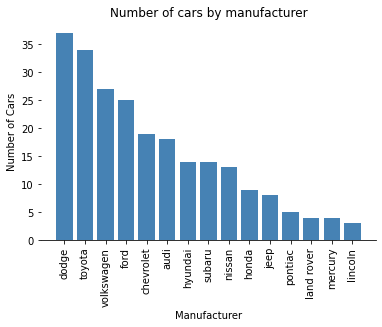

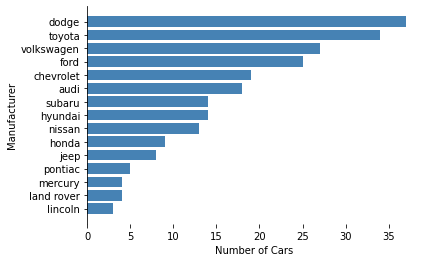

In [6]:
m_counts = mpg['manufacturer'].value_counts()

plt.bar(m_counts.index, m_counts, color='steelblue')
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cars")
plt.title("Number of cars by manufacturer")
plt.xticks([i for i, _ in enumerate( m_counts.index)], m_counts.index, rotation='vertical')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

m_counts = mpg['manufacturer'].value_counts().sort_values(ascending=True)
plt.barh(m_counts.index, m_counts, color='steelblue')
plt.ylabel("Manufacturer")
plt.xlabel("Number of Cars")
#plt.title("Number of cars by manufacturer")
#plt.xticks([i for i, _ in enumerate( m_counts.index)], m_counts.index, rotation='vertical')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

### Grouped Bar Chart

This can be manually produced from a 2 or more series of data: [matplotlib group bar chart](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html)


In [7]:
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/Python/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""


titanic = pd.read_csv(data_file_prefix + "titanic.csv")
titanic['pclass'] = np.where(titanic['pclass'] ==1, "First", titanic['pclass'])
titanic['pclass'] = np.where(titanic['pclass'] =="2", "Second", titanic['pclass'])
titanic['pclass'] = np.where(titanic['pclass'] =="3", "Third", titanic['pclass'])

In [8]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,Third,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,Third,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,Third,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,Third,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,Third,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


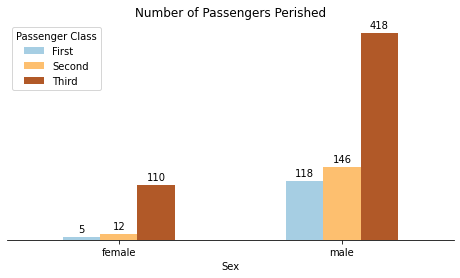

In [9]:
import matplotlib as mpl
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
ax = titanic.where(titanic.survived ==0).groupby(['pclass','sex'])['pclass'].count().unstack(0).plot.bar(title="", figsize=(8,4), colormap='Paired')
ax.set_xlabel("Sex")
ax.set_ylabel("Number Survived");
ax.set_title("Number of Passengers Perished")
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(title='Passenger Class')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    
bars = [rect for rect in ax.patches]
autolabel(bars)
ax.axes.get_yaxis().set_visible(False)

## Slopegraph

In [10]:
import altair as alt

alt.Chart(titanic).transform_aggregate(
    survived='sum(survived)',
    number='count(survived)',
    groupby=['sex','pclass']
).transform_calculate(new='datum.survived / datum.number').mark_line().encode(
    x=alt.X('sex',title="Gender", axis=alt.Axis(labelAngle=0)),
    y=alt.Y('new:Q',axis=alt.Axis(title="Survival Probability",grid=False)),
    color=alt.Color('pclass', title = 'Passenger Class', sort=None)
).properties(width=400).configure_view(
    strokeOpacity=0
)

#.configure_axisY(   titleAngle=0,    titleAlign="left",    titleY=-10,    titleX=-25,)

alt.Chart(...)

### Dot Plot
This is really just a scatter plot, but using a categorical variable for the y-axis

In [11]:
averageCityMPG = mpg.groupby('manufacturer')['cty'].mean().sort_values()

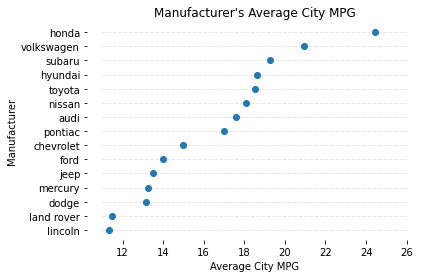

In [12]:
plt.scatter(averageCityMPG,averageCityMPG.index)
plt.xlabel('Average City MPG')
plt.ylabel('Manufacturer')

# add light dashed line
plt.hlines(y=averageCityMPG.index, xmin=11, xmax=26, color='gray', alpha=0.2, linewidth=1, linestyles='dashed')

plt.title("Manufacturer's Average City MPG")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

## Visualize the right data

Example adapted from Figures 7.9,7.10, and 7.11 in Effective Data Storytelling by Brent Dykes. Wiley. 2020

In [13]:
revenue_customers = [
    ["Jan", 2.5, 500],
    ["Feb",3.2, 650],
    ["Mar",3.9, 800],
    ["Apr",4.6, 960],
    ["May",5.3,1125],
    ["Jun",6.0,1300],
    ["Jul",6.7,1500],
    ["Aug",7.4,1700],
    ["Sep",8.1,1900],
    ["Oct",8.8,2100],
    ["Nov",9.5,2300],
    ["Dec",10.2,2500]
]

# columns
columns = ['Month','revenue', 'customers']

df = pd.DataFrame(revenue_customers, columns=columns)
print(df)

df.loc[0,'revenueChangePercent'] = .30
for i in range(1, len(df)):
    df.loc[i, 'revenueChangePercent'] = (df.loc[i, 'revenue'] - df.loc[i-1, 'revenue'])/df.loc[i-1, 'revenue']

df.loc[0,'customerChangePercent'] = .37
for i in range(1, len(df)):
    df.loc[i, 'customerChangePercent'] = (df.loc[i, 'customers'] - df.loc[i-1, 'customers'])/df.loc[i-1, 'customers']
    
df['revenuePerCustomer'] = df.revenue/df.customers *1000000
    
df  


   Month  revenue  customers
0    Jan      2.5        500
1    Feb      3.2        650
2    Mar      3.9        800
3    Apr      4.6        960
4    May      5.3       1125
5    Jun      6.0       1300
6    Jul      6.7       1500
7    Aug      7.4       1700
8    Sep      8.1       1900
9    Oct      8.8       2100
10   Nov      9.5       2300
11   Dec     10.2       2500


,Month,revenue,customers,revenueChangePercent,customerChangePercent,revenuePerCustomer
0,Jan,2.5,500,0.300000,0.370000,5000.000000
1,Feb,3.2,650,0.280000,0.300000,4923.076923
2,Mar,3.9,800,0.218750,0.230769,4875.000000
3,Apr,4.6,960,0.179487,0.200000,4791.666667
4,May,5.3,1125,0.152174,0.171875,4711.111111
5,Jun,6.0,1300,0.132075,0.155556,4615.384615
6,Jul,6.7,1500,0.116667,0.153846,4466.666667
7,Aug,7.4,1700,0.104478,0.133333,4352.941176
8,Sep,8.1,1900,0.094595,0.117647,4263.157895
9,Oct,8.8,2100,0.086420,0.105263,4190.476190


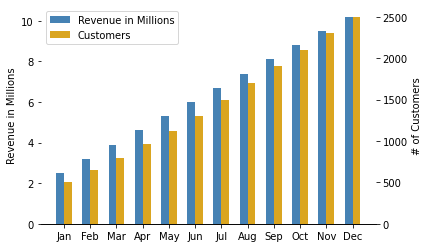

In [14]:
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(np.arange(12) + w /2, df['Month'], rotation='horizontal')
rev =ax1.bar(np.arange(12), df.revenue, width=w, color='steelblue', align='center')
plt.ylabel('Revenue in Millions')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
cust =ax2.bar(np.arange(12) + w, df.customers, width=w,color='goldenrod',align='center')
#Set the Y axis label as GDP.
plt.ylabel('# of Customers')
#To set the legend on the plot we have used plt.legend()
plt.legend([rev,cust],['Revenue in Millions', 'Customers'])

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

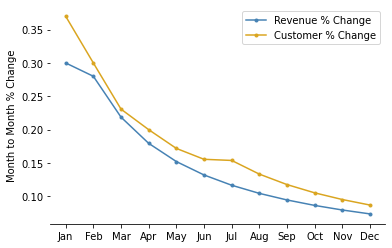

In [15]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(df.Month, df.revenueChangePercent, label='Revenue % Change',color='steelblue', marker=".")  
ax.plot(df.Month, df.customerChangePercent, label='Customer % Change',color='goldenrod' , marker=".") 

ax.set_ylabel('Month to Month % Change') 
#ax.set_title("Percentage Change for Revenue and Customers")  # Add a title to the axes.
ax.legend();  # Add a legend. 

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

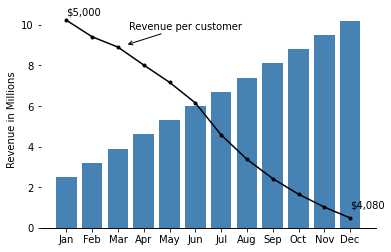

In [16]:
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
rev =ax1.bar(df.Month, df.revenue, color='steelblue', align='center')
plt.ylabel('Revenue in Millions')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
cust =ax2.plot(df.Month, df.revenuePerCustomer, color='black', marker=".")
#Set the Y axis label as GDP.
#plt.ylabel('Revenue per Customer')

ax1.text(0,10.5, '${:0,.0f}'.format(df['revenuePerCustomer'][0]))
ax1.text(11,1, '${:0,.0f}'.format(df['revenuePerCustomer'][11]))

ax1.annotate('Revenue per customer',
            xy=(2.3, 9), xycoords='data',
            xytext=(0.6, 0.95), textcoords='axes fraction',
             arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_visible(False)

#To show the plot finally we have used plt.show().
plt.show()

## Bank Holders by gender

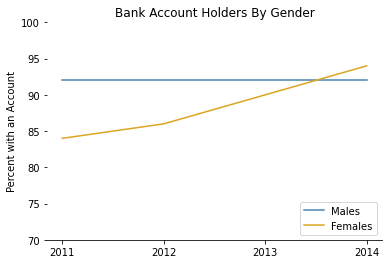

In [17]:
bankHolders = [
    [2011,92, 84],
    [2012,92, 86],
    [2013, 92, 90],
    [2014,92, 94]
]

# columns
columns = ['year','Male', 'Female']

df = pd.DataFrame(bankHolders, columns=columns)
fig, ax = plt.subplots()  # Create a figure and an axes.

ax.plot(df.year, df.Male, label='Males', color='steelblue')
ax.plot(df.year, df.Female, label='Females', color = 'goldenrod')
ax.set_ylabel("Percent with an Account")
ax.set_xlabel("")
ax.set_title("Bank Account Holders By Gender")
ax.set_ylim(70,100)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="lower right")

plt.show()

## Disect the Factors

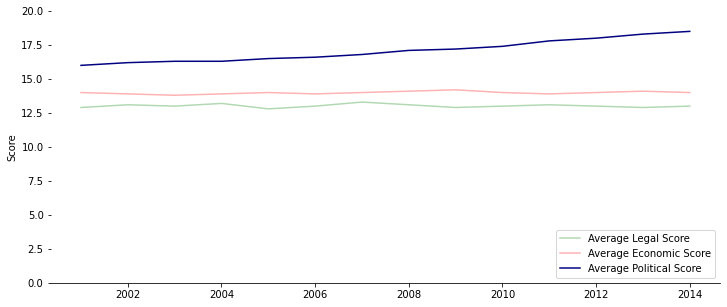

In [18]:
pressScores = [
    [2001, 12.9, 14, 16],
    [2002, 13.1, 13.9, 16.2],
    [2003, 13, 13.8, 16.3],
    [2004, 13.2, 13.9, 16.3],
    [2005, 12.8, 14, 16.5],
    [2006, 13, 13.9, 16.6],
    [2007, 13.3, 14, 16.8],
    [2008, 13.1, 14.1, 17.1],
    [2009, 12.9, 14.2, 17.2],
    [2010, 13, 14, 17.4],
    [2011, 13.1, 13.9, 17.8],
    [2012, 13, 14, 18],
    [2013, 12.9, 14.1, 18.3],
    [2014, 13, 14, 18.5]
]

# columns
columns = ['year', 'legal_score', 'economic_score','political_score']

df = pd.DataFrame(pressScores, columns=columns)
fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(12, 5)

ax.plot(df.year, df.legal_score, label='Average Legal Score', color='green', alpha=0.3)
ax.plot(df.year, df.economic_score, label='Average Economic Score', color='red', alpha=0.3)
ax.plot(df.year, df.political_score, label='Average Political Score', color='navy')


ax.set_ylabel("Score")
ax.set_xlabel("")
ax.set_title("")
ax.set_ylim(0,20)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="lower right")

plt.show()